In [9]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import helpers
import pandas as pd
from skimage import exposure
from PIL import Image
from scipy import ndimage
from skimage.measure import label, regionprops_table, regionprops
from mpl_toolkits import mplot3d
from skimage.io import imread_collection

In [5]:
filenames = !ls /media/sda/data/labeled/F20_11/*.npy

In [10]:
z = imread_collection(filenames)

In [20]:
i1 = np.load(filenames[0])
i2 = np.load(filenames[1])
iz = np.stack([i1, i2])

In [33]:
np.indices(i1.shape)

array([[[   0,    0,    0, ...,    0,    0,    0],
        [   1,    1,    1, ...,    1,    1,    1],
        [   2,    2,    2, ...,    2,    2,    2],
        ...,
        [3858, 3858, 3858, ..., 3858, 3858, 3858],
        [3859, 3859, 3859, ..., 3859, 3859, 3859],
        [3860, 3860, 3860, ..., 3860, 3860, 3860]],

       [[   0,    1,    2, ..., 3858, 3859, 3860],
        [   0,    1,    2, ..., 3858, 3859, 3860],
        [   0,    1,    2, ..., 3858, 3859, 3860],
        ...,
        [   0,    1,    2, ..., 3858, 3859, 3860],
        [   0,    1,    2, ..., 3858, 3859, 3860],
        [   0,    1,    2, ..., 3858, 3859, 3860]]])

In [37]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
np.indices(x.shape)[0].ravel()

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

TypeError: Input z must be 2D, not 1D

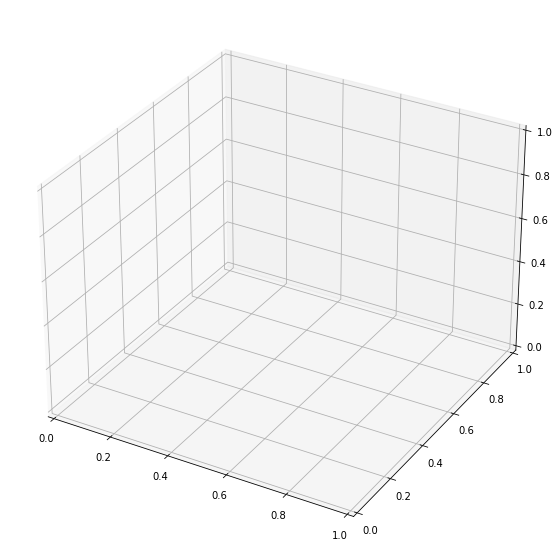

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
# x = np.arange(0, i1.shape[0], 1)
# y = np.arange(0, i1.shape[1], 1)
x = np.indices(i1.shape)[0].ravel()
y = np.indices(i1.shape)[1].ravel()

# X, Y = np.meshgrid(x, y)
# ax.contour3D(X, Y, iz, 50, cmap='binary')
ax.contour3D(x, y, i1.ravel(), 50, cmap='binary')
# ax.contour3D(Z=iz, cmap='binary')

In [6]:
filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_02043.tif'
# filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_04995.tif'

img = cv2.imread(filename,0)
i = cv2.GaussianBlur(img, (5,5), 0)
i = helpers.remove_data_based_on_radius(i, np.nan)

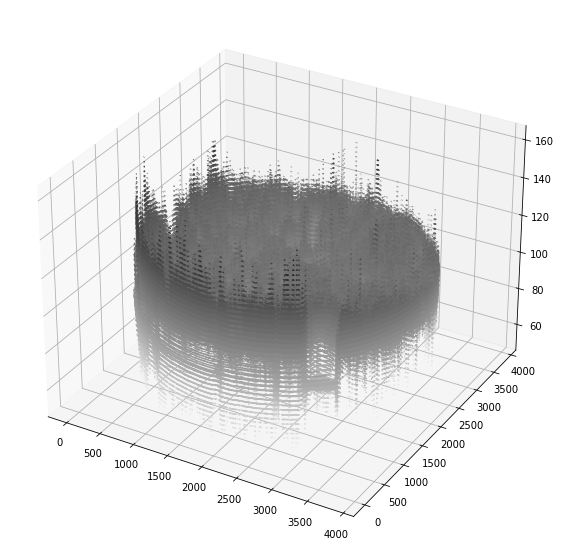

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
x = np.arange(0, img.shape[0], 1)
y = np.arange(0, img.shape[1], 1)

X, Y = np.meshgrid(x, y)
ax.contour3D(X, Y, i, 50, cmap='binary')
